In [1]:
%matplotlib notebook

import cv2
import pytesseract
import pandas as pd
import os
import matplotlib.pyplot as plt
import itertools

pytesseract.get_tesseract_version()

LooseVersion ('4.0.0.20181030')

## First test

In [2]:
#screenshot_dir = r'C:\Users\Robin\AppData\Roaming\.minecraft\screenshots'
screenshot_dir = r'D:\Github\minecraft_mapper\Screenshots'
text_dir = r'D:\Github\minecraft_mapper\TextFiles'
processed_dir = r'D:\Github\minecraft_mapper\Processed'
tessdata_dir = r'C:\Program Files (x86)\Tesseract-OCR\tessdata'

In [3]:
img_name = r'screenshot_test.png'

In [4]:
img = cv2.imread(os.path.join(screenshot_dir, img_name))
print(img.shape)

(1080, 1920, 3)


<IPython.core.display.Javascript object>


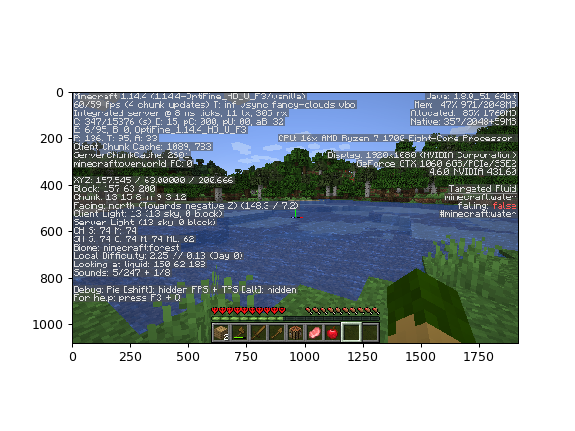

In [5]:
# OpenCV represents RGB images as multi-dimensional NumPy arrays…but in reverse order!

fig, ax = plt.subplots()
im = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
def get_string(img, keep_n = True, config = r'--psm 3'):
    string = pytesseract.image_to_string(img, lang='eng', config = config)
    return string

In [7]:
def clean_string(string):
    tmp = ''
    for line in string:
        tmp += line.replace('\n', ' ') #strip('\n') #
    tmp = tmp.replace("'",'"')
    return tmp

In [8]:
string = get_string(img)

In [9]:
string = clean_string(string)
print(string)

Mimecraft 1,144 1 1499-0ptiFine_HO_U_F32 wanillas &H/59 fps o chunk updates: T: inf wsanc fancu—clouds vbo Integrated server @ 2 m= ticks, 11 tx, 3685 rx IS T el el O o I S = W 1 1 I o = e E: 6795 E: A, OptiFine_1.14.4_HO F: 136 T: 95, A: 33 Client Chunk Cache: 1829 723 ServerChunkBache: Z6E1 minectattoverworld FCE  ATZ 157.545 / 628606868 ¢ 26860 685 Block: 157 &2 2608 . : Chunk: 12 1528 in9 32 12 e Facing: north (Towards negative 22 (1433 £ 7.2 Client Light: 12 13 =ky, 8 blocks  Serwver Light: 13 sky, 8 blocks  CH S 79 H: 74  SHS 7074 M 79 HL: 62  Biome: minecraft:forest  Lozal Difficulty; 225 £ 812 (Dag &  Looking at Lliguid: 158 &2 188  Sounds: 52497 + 158  Oebug: Fie [shiftl: hidden FFS + TFS [altl hidden  : Digp_ga,%  Jf 3  For help: press F3 + 1 PS A e Rk  - A - A                                           Jdaua: 1208 51 cdhbit Mem: 474 971 2892ME Allozated: 235K 17eBME Hative: 257 =26848+52M6  CEL: 16x AMD Fuzen 7 17688 Eight-Core =Tl =t 19281886 (HYIDIA Corporation?  efgroe 0T 

Not a great conversion accuracy it seems. Let's use the Jaccard measure to try and quantify the difference between a ground truth I typed up.

In [10]:
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [11]:
with open(os.path.join(text_dir, 'ground_truth.txt'), 'r') as file:
    ground_truth = ''
    for line in file:
        ground_truth += line
file.close()
ground_truth = clean_string(ground_truth)
print(ground_truth)

Minecraft 1.14.4 (1.14.4-OptiFine_HD_U_F3/vanilla) Java: 1.8.0_51 64bit 60/59 fps (4 chunk updates) T: inf vsync fancy-clouds vbo Mem: 47% 971/2048MB Integrated server @8 ms ticks, 11 tx, 305 rx Allocated: 85% 1760MB C: 347/15376 (s) D: 15, pC: 000, pU: 00, aB:32 Native: 357/2048+59MB E: 6/95, B: 0, OptiFine_1.14.4_HD_U_F3 P:136. T:95, A: 33 CPU: 16x AMD Ryzen 7 1700 Eight-Core Processor Client Chunk Cache: 1089, 783 ServerChunkCache: 2601 Display: 1920x1080 (NVIDIA Corporation) minecraft:overworld FC: 0 GeForce GTX 1060 6GB/PCIe/SSE2 4.6.0 NVIDIA 431.60 XYZ: 157.545 / 63.00000 / 200.666 Block: 157 63 200 Targeted Fluid Chunk: 13 15 8 in 9 3 12 minecraft:water Facing: north (Towards negative Z) (-148.3 / 7.2) falling: Client Light: 13 (13 sky, 0 block) #minecraft:water Server Light: (13 sky, 0 block) CH S: 74 M: 74 SH S: 74 O: 74 M: 74 ML: 62 Biome: minecraft:forest Local Difficulty: 2.25 // 0.13 (Day 0) Looking at liquid: 150 62 188 Sounds: 5/247 + 1/8  Debug: Pie [shift]: hidden FPS 

In [12]:
sim = get_jaccard_sim(string, ground_truth)
print(sim)

0.21052631578947367


## Improvements

Try some image processing to see if we can make it easier. First, try re-sizing and converting to greyscale

In [13]:
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

<IPython.core.display.Javascript object>


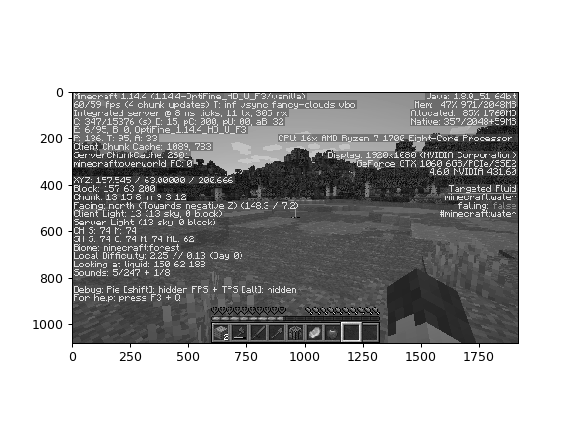

In [14]:
fig, ax = plt.subplots()
im = plt.imshow(grey_img, cmap='gray')
plt.show()

In [15]:
string_grey = get_string(grey_img)
string_grey = clean_string(string_grey)
print(string_grey)

Mimecratft 1,144 1 149 9-0ptiFine_HO_U_F32 wanillas Jdava: 126851 &dbit &H/59 fps o chunk updatess T: inf wsanc fancu—clouds vbo Mem: 474 971 2892M6 Integrated server @ 2 m= ticks, 11 tx, 3685 rx Allozated: 8357 17EAME e £ il o oy O~ I s e = iy . [ I | = e Hative: 357/ 2892+53HME  E: /95, B: 8, OptiFine_1.14.4_HD : = F: 136, T: 95, A: 33 CELE 162 AMD Fuzen 7 1788 Eight-Core Frocessor ] Digp_l.’a"u 19281038 CHWIDIA Corporation: i        Client Chunk Cache: 1829 723 ServerChunkCache: 2681 an:-r*ce [ I B Y Tl ) =l 4668 HVIDIA 43168  minectattoverworld FCOE  TR T R e N s s e e e T  Block: 157 &2 Z60A Targeted Fluid Chunk: 12 152 in 9 3 12 R o e e R L e Facing: north (Towards negative 22 (1483 7 7.2 falling: fal=e Client Light: 12 13 =sky, B block? B #minecr-aftwater Serwver Light: 13 =ky, 8 blocks  CH S 79 H: 74  SHS 70 74 M 79 HL: 62  Biome: minecraft:forest  Lozal Difficulty; 225 £ 812 (Dag &3 Looking at Lliguid: 1568 &2 188 Sounds: 52497 + 158  Oebug: Fie [shiftl: hidden FFS + TFS [altl

In [16]:
get_jaccard_sim(string_grey, ground_truth)

0.20754716981132076

Maybe worse... :(

In [17]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_LINEAR):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

In [18]:
med_img = image_resize(img, height = 720)
med_img.shape

(720, 1280, 3)

<IPython.core.display.Javascript object>


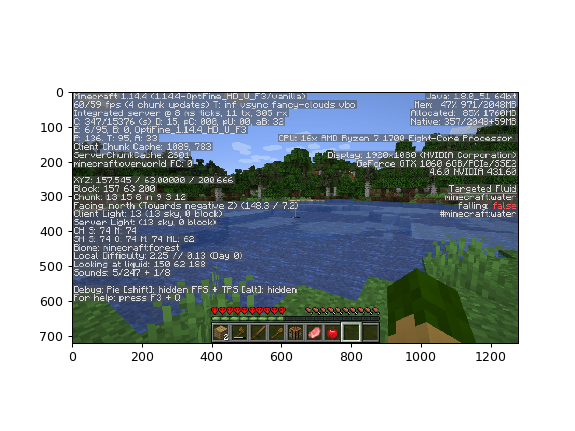

In [19]:
fig, ax = plt.subplots()
im = plt.imshow(cv2.cvtColor(med_img, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
string_med = get_string(med_img)
string_med = clean_string(string_med)
print(string_med)

R= XN - T  RIS T ] Cliznt Chunk Cache: 1829, 723 ServerChunkBache: 2601 ¥ Dl"p‘l"i’j 19283026 CHVIDIA Corporation?  EFgroe OTH 1868 606/FLIe 3562 468 NVIDIA 43168  minectaftoverworld FCTE  HIZ: 157,545 / 6300000 / 206666     Block: 157 63 266 E . i g = = Targeted Fluid Churmk: 12 15 8 in 9 3 12 £ saml minecrattuater Facing: north (Towards negative 2) (1423 7 7.2 falling: false Client Light: 12 {13 sku, 8 block) 2= #minecraftuater Server Light: <12 sky, 8 block>  CHS: 74074  SH S 74 0: 74 M 74 ML 62  Biome: minecraftforest  Local Difficulty: 225 /¢ 8.13 (Day 8> z Looking at liguid: 158 62 188 ER Sounds: 55247 + 178  Debua: Fie [shiftl: hidden FFS + TFS [altl: hidden For help: press F3 + 0 pa  CIGRPRIRAERaRED SR \\" S  CEEEEDEOER .k


In [21]:
get_jaccard_sim(string_med, ground_truth)

0.1956521739130435

Meh

In [22]:
med_grey_img = image_resize(grey_img, height = 720)
med_grey_img.shape

(720, 1280)

In [23]:
string_medgrey = get_string(med_grey_img)
string_medgrey = clean_string(string_medgrey)
print(string_medgrey)

Minecraft 1.14.4 ¢1.14.4-0ptiFine_HO_U_F3 wanillas Jdava: 1.2.8_51 &dbit EB8/59 fps (4 chunk updates) T:inf wsunc fanc Integrated server @ 8 ms ticks, 11 tx, 385 i  APt 35?!2348+59MB BTN T L Ras £x AMD Fuzen 7 17868 Eight—Core Frocessor  Cliznt Chunk Cache: 1829, 723  ServerChunkbache: 2681 ¥ DI.P_I‘\% 192810268 CHVIDIA Corporation?  I T=TaT =) i TR =T Tl U B eFgroe OTH 16868 606/FLIe 3562 468 HYIDIA 432168     HIZ: 157,545 / 6300000 / 206666  Block: 1537 &2 260 : Targeted Fluid Churmk: 12 15 8 in 9 2 12 ; g minecraftuater Facing: north (Towards negative 2) (1423 ~ T falling: false Client Light: 12 {132 sk, 8 block) #ninecraftuater Server Light: (12 sky, 8 block>  o =R e N |  SH S 74 0074 M 74 ML 62  Biome: minecraftforest  Local Difficulty: 225 /. 8,13 (Day &> Looking at liguid: 1568 &2 182 Sounds: 54247 + 1458  Debua: Fie [shiftl: hidden FF3 + TFS [altl: hidden For help: press F2 + 0


In [24]:
# def get_difference(a,b):

#     words=itertools.zip_longest(a,b,fillvalue=None)
#     incorrect=len([c for c,d in words if c!=d])
# #     print(incorrect)
#     return incorrect

In [25]:
get_jaccard_sim(string_medgrey, ground_truth)

0.204

Let's just start storing these and compare the others:

In [26]:
tests = []
tests.append(string)
tests.append(string_grey)
tests.append(string_med)
tests.append(string_medgrey)

In [27]:
test_strings = pd.Series(tests)

In [28]:
sim = []
for test in tests:
    sim.append(get_jaccard_sim(ground_truth, test))

In [29]:
simularity = pd.Series(sim)

In [30]:
dataframe = {'Name': ['string', 'string_grey', 'string_med', 'string_medgrey'], 'String': test_strings, 'Jaccard Sim': simularity}
df = pd.DataFrame(dataframe)

In [31]:
df.head()

,Name,String,Jaccard Sim
0,string,"Mimecraft 1,144 1 1499-0ptiFine_HO_U_F32 wanil...",0.210526
1,string_grey,"Mimecratft 1,144 1 149 9-0ptiFine_HO_U_F32 wan...",0.207547
2,string_med,"R= XN - T RIS T ] Cliznt Chunk Cache: 1829, 7...",0.195652
3,string_medgrey,Minecraft 1.14.4 ¢1.14.4-0ptiFine_HO_U_F3 wani...,0.204000


Hmmm so looking at this what I thought was good qualitatively was maybe worse...let's apply some super basic image processing. I first loaded and played around in ImageJ to quickly prototype some params. The threshold is pretty consistent and wonderfully enough there is a faint grey block surrounding the text so that it never really interferes with the image itself.

In [32]:
thresh_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_,thresh_img = cv2.threshold(thresh_img,220,255,cv2.THRESH_BINARY)

In [33]:
thresh_img.shape

(1080, 1920)

<IPython.core.display.Javascript object>


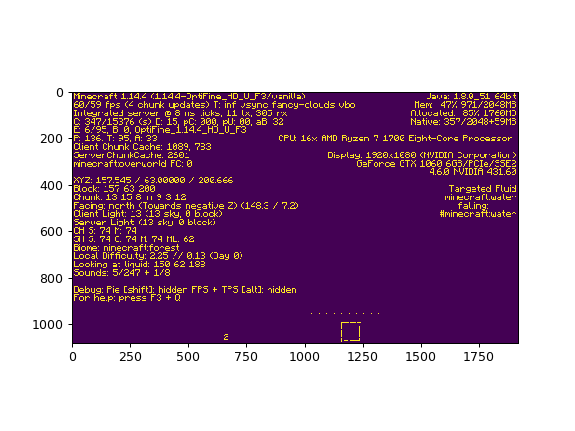

In [34]:
fig, ax = plt.subplots()
im = plt.imshow(thresh_img)
plt.show()

In [35]:
string_thresh = get_string(thresh_img)
string_thresh = clean_string(string_thresh)
print(string_thresh)

Minecraft 1,144 (1 1499-0ptiFine_HDO_U_F32 wanillas Jdava: 128 51 &dbit  &H8/59 fps o chunk updatess T: inf wsanc fancy—clouds vbo Mem: 477 9712892M6  Integrated server @ 2 m= ticks, 11 tx, 3685 rx Allozated: 837 17aEME  C: 247715376 (=0 O: 15, pC: 88, pU: 68, ab: 32 Hative: 3537/28428+59M6  E: 6795 B A, OptiFine_1.144_HD_U_F232  F: 136, T: 95, A: 33 CFLU: 16x AMD Fyzen 7 1788 Eight—-Core Frocessor  Client Chunk Cache: 18389, 723  ServerChunkCache: 2681 Oizplag: 1928x16828 CHVIDIA Corporation:  minectattoverworld FC: @ Oeforce O0TH 1868 &06/FCIesS3E2 4668 HVIDIA 43168  ATZ: 157.545 7 62860868 / 2060686  Block: 157 &2 Z6A Targeted Fluid  Chunk: 12 15 2in 9 3 12 minecraftuwater  Facing: north (Towards negative 2 (1483 7 7.2 fallina:  Client Light: 132 <132 =ky, @ blocks #minecraftwater  Server Light: <132 =ky, 8 blocks  CH S 79 H: 74  SHS 70 74M 79 HL: 62  Biome: minecraft:forest  Lozal Difficulty; 225 44 812 (Dag @ Looking at Lliguid: 158 62 188  bl T T I Tt A S I  Oebug: Fie [shiftl: h

In [36]:
def add_row(df, name, values):
    df = df.append({'Name': '{}'.format(name), 'String': values, 'Jaccard Sim': get_jaccard_sim(ground_truth, values)}, ignore_index=True)
    return df

In [37]:
df = add_row(df, 'string_thresh', string_thresh)

In [38]:
df

,Name,String,Jaccard Sim
0,string,"Mimecraft 1,144 1 1499-0ptiFine_HO_U_F32 wanil...",0.210526
1,string_grey,"Mimecratft 1,144 1 149 9-0ptiFine_HO_U_F32 wan...",0.207547
2,string_med,"R= XN - T RIS T ] Cliznt Chunk Cache: 1829, 7...",0.195652
3,string_medgrey,Minecraft 1.14.4 ¢1.14.4-0ptiFine_HO_U_F3 wani...,0.204000
4,string_thresh,"Minecraft 1,144 (1 1499-0ptiFine_HDO_U_F32 wan...",0.242063


In [39]:
# Update previous values
#df.loc[df['Name'] == 'string_thresh' , 'Accuracy'] = get_accuracy(ground_truth, string_thresh)

In [40]:
#df.drop_duplicates() or df.drop(df.tail(n).index,inplace=True)

In [41]:
# params = [cv2.IMWRITE_PNG_COMPRESSION, 1]
# cv2.imwrite('Thresh_img.png', thresh_img, params) 

<IPython.core.display.Javascript object>


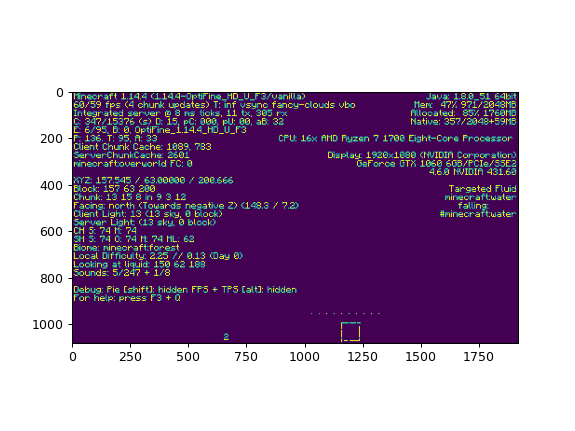

In [42]:
thresh_blur_img = cv2.GaussianBlur(thresh_img,(5,5), 0)
fig, ax = plt.subplots()
im = plt.imshow(thresh_blur_img)
plt.show()

In [43]:
string_threshblur = get_string(thresh_blur_img)
string_threshblur = clean_string(string_threshblur)
print(string_threshblur)

Minecraft 1.14.4 (1.1449-0ptiFine_HD_U_F3/vanilla> Java: 1.2868_51 &dbit  68,/99 fps (4 chunk updates) T: inf vsunc fancu—-clouds vbo Mem: 474 971/28428M6  Integrated server @ 2 ms ticks, 11 tx, 365 rx Allocated: 837 17668ME  C: 347715376 (=2 O: 15, pC: 688, plU: 88, a6 32 Native: 357/2843+59M6  E: 6795 B 8, OptiFine_1.144_HD_U_F3  F: 136. T: 95, A: 33 CFL: 16x AMD Fuzen 7 1788 Eight-Core Frocessor  Client Chunk Cache: 18389, 723  ServerChunkCache: 2681 Displag: 1928x162868 (NVIDIA Corporation?  minecraftoverworld FC: 8 GefForce OTH 1868 &606/FCIe/33E2 4.6.8 NVIDIA 43168  ATZ2: 157.545 7 6£32.80088 7 200666  Block: 157 62 264 Targeted Fluid  Chunk: 12 15 2in 9 3 12 minecraftwater  Facing: north (Towards negative 2 (1433 ~ 7.2 falling:  Client Light: 12 <13 sky, 8 block? #minecraftuater  Server Light: (13 sky, 8 block?  CHS: 74 HM 74  SHS: 740 79M 74 ML: 62  Biome: minecraft:.forest  Local Difficulty: 225 // 8.13 (Dayg & Looking at ligquid: 158 62 188 Sounds: 5297 + 178  Debug: Fie [shi

In [44]:
df = add_row(df, 'string_threshblur', string_threshblur)

In [45]:
df.drop_duplicates()

,Name,String,Jaccard Sim
0,string,"Mimecraft 1,144 1 1499-0ptiFine_HO_U_F32 wanil...",0.210526
1,string_grey,"Mimecratft 1,144 1 149 9-0ptiFine_HO_U_F32 wan...",0.207547
2,string_med,"R= XN - T RIS T ] Cliznt Chunk Cache: 1829, 7...",0.195652
3,string_medgrey,Minecraft 1.14.4 ¢1.14.4-0ptiFine_HO_U_F3 wani...,0.204000
4,string_thresh,"Minecraft 1,144 (1 1499-0ptiFine_HDO_U_F32 wan...",0.242063
5,string_threshblur,Minecraft 1.14.4 (1.1449-0ptiFine_HD_U_F3/vani...,0.330435


Although it has got better, I think this is fairly a lost cause. We learned a bit about Tesseract and it's use with the python API wrapper pytesseract but unfortunately it is not going to serve our purpose. Just to check it is the font and not us, let's just use it for a regular text image. 

In [46]:
# df.loc[df['Name'] == 'string_threshblur' , 'Jaccard Sim'] = get_jaccard_sim(ground_truth, string_threshblur)
# df.loc[df['Name'] == 'string_threshblur' , 'String'] = string_threshblur

<IPython.core.display.Javascript object>


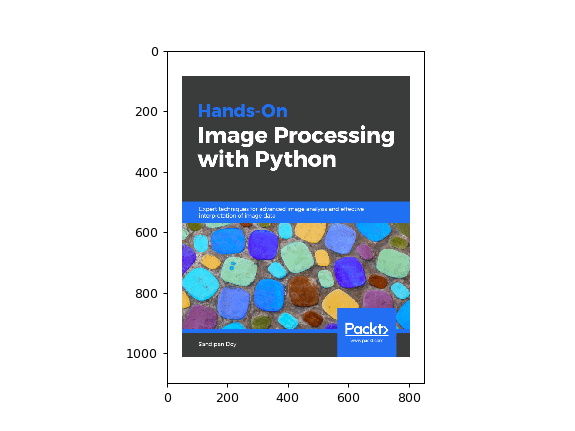

In [47]:
test_img = cv2.imread('test_img.png')
fig, ax = plt.subplots()
im = plt.imshow(test_img)
plt.show()

In [48]:
string_test = pytesseract.image_to_string(test_img)
string_test = clean_string(string_test)
print(string_test)

Image Processing with Python  Expert techniques for advanced image analysis and effective interpretation of image data  o [e/14p}  s  Sandipan Dey


So, it does a pretty good job at getting the text from this cover page, but I have found it is extremely sensitive to font type. Working best for standard fonts like Times New Roman, Arial etc.

In [49]:
params = [cv2.IMWRITE_PNG_COMPRESSION, 1]
cv2.imwrite(os.path.join(processed_dir,'Thresh_blur_img.png'), thresh_blur_img, params)

True

In [50]:
from google.cloud import vision
from google.cloud.vision import types

In [51]:
#path to environment variables
#GOOGLE_APPLICATION_CREDENTIALS=/path/to/your/apikey.json
#client = vision.ImageAnnotatorClient()
client = vision.ImageAnnotatorClient.from_service_account_file(
r'D:\Docs\Python_code\Google-vision-api\minecraft-mapper-20c761f10d32.json'
)

In [52]:
#image_to_open = r'C:\Users\Robin\AppData\Roaming\.minecraft\screenshots\2019-08-15_16.16.35.png'
image_to_open = os.path.join(processed_dir,'Thresh_blur_img.png')

with open(image_to_open, 'rb') as image_file:
    content = image_file.read()

In [53]:
image = vision.types.Image(content=content)

text_response = client.text_detection(image=image)

In [54]:
string_Gvision = text_response.text_annotations[0].description
string_Gvision = clean_string(string_Gvision)

In [55]:
print(string_Gvision)

Minecraft 1.14.4 (114.4-0ptiFine_HD_U_F3vanilla) 60/59 fps (4 chunk updates) T: inf vsync_fancy-clouds vbo Integrated server e 8 ms ticks, 11 tx, 305 rx C: 347/15376 (s) D: 15, pC: 000, pU: 00, aB: 32 E: 6/95, B: 0, Optifine_1.14.4_HD_U_F3 P: 136. T: 95, A: 33 Client Chunk Cache: 1089, 783 ServerChunkCache: 2601 minecraft:overworld FC: 0 Java: 1.8.0 51 64bit Mem: 47% 971/2048MB Allocated: 85 1760MB Native: 357/2048+59MB CPU: 16x AMD Ryzen 7 1700 Eight-Core Processor Display: 1920x1080 (NVIDIA Corporation) GeForce GTM 1060 6GB/PCIe/SSE2 4.6.0 NVIDIA 431.60 XYZ: 157.545 /63.00000 / 200.666 Block: 157 63 200 Chunk: 13 15 8 in 9 3 12 Facing: north CTowards negative 2) (148.3/ 7.2) Client Light: 13 (13 sky, 0block) Server Light: (13 sky, block) CH S: 74 M: 74 SH 3: 74 0: 74 M 74 ML: 62 Biome: minecraft:forest Local Difficulty: 2.25 / 0.13 (Day 0) Looking at liquid: 150 62 188 Sounds: 5/247 +1/8 Targeted Fluid minecraftuater falling: #minecraftuater Debug: Pie [shift]; hidden FPS + TPS [alt)

In [56]:
df = add_row(df, 'GVision_threshblur', string_Gvision)

In [57]:
df.drop_duplicates()

,Name,String,Jaccard Sim
0,string,"Mimecraft 1,144 1 1499-0ptiFine_HO_U_F32 wanil...",0.210526
1,string_grey,"Mimecratft 1,144 1 149 9-0ptiFine_HO_U_F32 wan...",0.207547
2,string_med,"R= XN - T RIS T ] Cliznt Chunk Cache: 1829, 7...",0.195652
3,string_medgrey,Minecraft 1.14.4 ¢1.14.4-0ptiFine_HO_U_F3 wani...,0.204000
4,string_thresh,"Minecraft 1,144 (1 1499-0ptiFine_HDO_U_F32 wan...",0.242063
5,string_threshblur,Minecraft 1.14.4 (1.1449-0ptiFine_HD_U_F3/vani...,0.330435
6,GVision_threshblur,Minecraft 1.14.4 (114.4-0ptiFine_HD_U_F3vanill...,0.712707


Wow, that is more like it! We are finally getting the correct XYZ values. Additionally, the '/' are also kept which can help us to extract the values.

Try on another image

In [58]:
img_name = r'2019-08-17_12.23.15.png'
img2 = cv2.imread(os.path.join(screenshot_dir, img_name))

In [59]:
def process_image(img):
    thresh_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,thresh_img = cv2.threshold(thresh_img,220,255,cv2.THRESH_BINARY)
    thresh_img = cv2.GaussianBlur(thresh_img,(5,5), 0)
    return thresh_img

In [60]:
test_img = process_image(img2)
params = [cv2.IMWRITE_PNG_COMPRESSION, 1]
cv2.imwrite('test_img2.png', test_img, params)

True

In [61]:
image_to_open = r'D:\Github\minecraft_mapper\test_img2.png'

with open(image_to_open, 'rb') as image_file:
    content = image_file.read()
    
image = vision.types.Image(content=content)
text_response = client.text_detection(image=image)
test_Gvision = text_response.text_annotations[0].description
test_Gvision = clean_string(test_Gvision)
print(test_Gvision)

Minecraft 1.14.4 1.14.4-0ptiFine_HD_U_F3/vanilla) 60/59 fps ( chunk updates) T: inf vsyno fancy-clouds vbo Integrated server e 5 ms ticks, 9 tx, 311 rx C: 3/15376 (s) D 15, pC: 000, pU: 00, aB: 32 E: 0/108, B: 0, OptiFine_1.14.4_HD_U_F3 F: 74. T: 108. A: 33 Client Chunk Cache: 1089, 783 ServerChunkCache: 2646 minecraft:overworld FC: 0 Java: 18.0_51 64bit Mem 23% 1934/8192MB Allocated: 62% 5088MB Native: 370/8192+59MB CPU: 16x AMD Ryzen 7 1700 Eight-Core Processor Display: 1920x1080 (NVIDIA Corporation) GeForce OTX 1060 60B/PCIe/SSE2 4.6.0 NVIDIA 431.60 XYZ: 155.9917 12.00000 / 286.100 Block: 155 12 286 Chunk: 11 12 14 in 9 0 17 Facing: south CTowards positive 2) -17.8/ 7.8) Client Light: 12 0 sky, 12 block) Server Light: (0 sky, 12 block) CH 3: 62 M: 62 SH 3: 62 0: 55 M: 62 ML: 62 Biome: minecraft:river Local Difficulty: 2.67 //033 (Day 10) Looking at block: 156 13 288 Looking at liquid: 156 13 288 Sounds: 7/247+0/8 Targeted Block minecraftdiamond_ore Targeted Fluid minecraftempty Debu

In [62]:
##To Do: create read and write function to transfer screenshots to 
##directory for processing and remove old files
def crawl_screen_shots(in_dir, out_dir):
    pass

In [63]:
## read in processed images to pandas
def read_images(in_dir):
    pass

In [64]:
def get_coords(img):
    pass